In [112]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [113]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(256, 256)


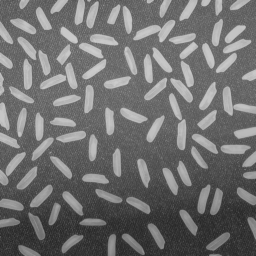

In [114]:
img = cv2.imread('/content/gdrive/My Drive/colabIP/Images/rice.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gimg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg.shape)
#plt.imshow(gimg1, cmap='gray')
cv2_imshow(gimg)

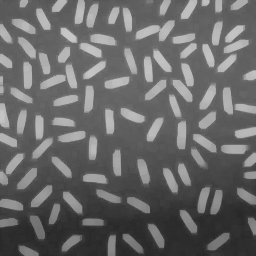

In [115]:
kernel = np.ones((3,3), np.uint8)
open_img = cv2.morphologyEx(gimg, cv2.MORPH_OPEN, kernel, iterations=2)
cv2_imshow(open_img)

In [116]:
gBin = np.zeros((gimg.shape[0], gimg.shape[1]), dtype = np.ubyte)

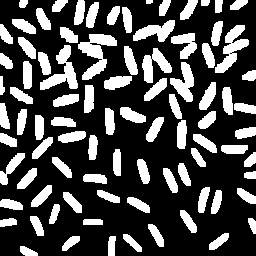

In [117]:
threshold = 110

for h in range(gimg.shape[0]):
  for w in range(gimg.shape[1]):
    if(open_img[h,w] > threshold):
      gBin[h,w] = 255

cv2_imshow(gBin)

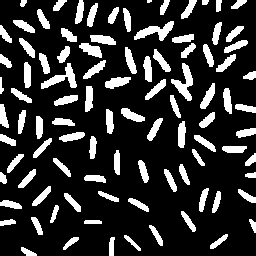

In [118]:
kernel = np.ones((3,3), np.uint8)
erode_img = cv2.erode(gBin, kernel, iterations=1)
cv2_imshow(erode_img)

In [119]:
num_labels, labels = cv2.connectedComponents(erode_img, 4)
print('number of rices : ', num_labels-1)

number of rices :  96


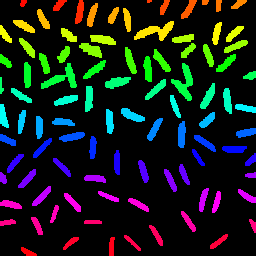

In [120]:
label_H = np.uint8(179*labels/np.max(labels))
blank = 255*np.ones_like(label_H)
labeled_img = cv2.merge([label_H, blank, blank])

labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_H==0] = 0

cv2_imshow(labeled_img)

In [124]:
unique_labels = np.unique(labels)
shuffled_labels = unique_labels.copy()
np.random.shuffle(shuffled_labels)
shuffled_labels_map = {orig: shuffled for orig, shuffled in zip(unique_labels, shuffled_labels)}
shuffled_labels_array = np.vectorize(shuffled_labels_map.get)(labels)

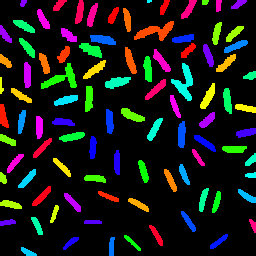

In [125]:
shuffled_label_H = np.uint8(179 * shuffled_labels_array / np.max(shuffled_labels_array))
blank = 255 * np.ones_like(shuffled_label_H)
shuffled_img = cv2.merge([shuffled_label_H, blank, blank])

shuffled_img = cv2.cvtColor(shuffled_img, cv2.COLOR_HSV2BGR)

shuffled_img[labels == 0] = [0, 0, 0]

cv2_imshow(shuffled_img)

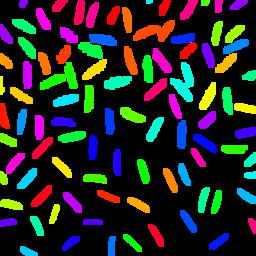

In [126]:
kernel = np.ones((3,3), np.uint8)
dilate_img = cv2.dilate(shuffled_img, kernel, iterations=1)
cv2_imshow(dilate_img)